Elementos faltantes:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
RMSE (Regressão Polinomial): 11485.205725615771


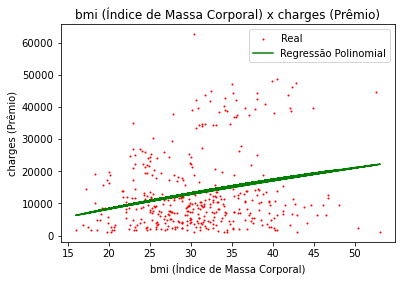

In [2]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Carrega os dados
df = pd.read_csv('diabetes.csv')

# Verifica elementos faltantes
print(f"Elementos faltantes:\n{df.isna().sum()}")

# Separação dos dados em treino e teste
XTrain, XTest, yTrain, yTest = train_test_split(df[["bmi"]], df["charges"], test_size=0.3)

# Cria as características polinomiais
poly = PolynomialFeatures(degree=2)  # Você pode ajustar o grau conforme necessário
XTrain_poly = poly.fit_transform(XTrain)
XTest_poly = poly.transform(XTest)

# Normalização usando Min-Max Scaling
# A normalização é especialmente importante ao usar algoritmos sensíveis à escala, como a regressão polinomial.
scaler = MinMaxScaler()
XTrain_scaled = scaler.fit_transform(XTrain_poly)
XTest_scaled = scaler.transform(XTest_poly)

# Regressão polinomial
regressor_poly = LinearRegression()
regressor_poly.fit(XTrain_poly, yTrain)

# Predict usando regressão polinomial
yPred_poly = regressor_poly.predict(XTest_poly)

# Calcula o RMSE para a regressão polinomial
rmse_poly = np.sqrt(mean_squared_error(yTest, yPred_poly))

print(f"RMSE (Regressão Polinomial): {rmse_poly}")

# Visualização
plt.scatter(XTest["bmi"], yTest, color='red', s=1, label='Real')
plt.plot(XTest["bmi"], yPred_poly, color='green', label='Regressão Polinomial')
plt.title("bmi (Índice de Massa Corporal) x charges (Prêmio)")
plt.xlabel("bmi (Índice de Massa Corporal)")
plt.ylabel("charges (Prêmio)")
plt.legend()
plt.show()